<a href="https://colab.research.google.com/github/KeenBean024/NLP_Seminar/blob/main/Seminar_NLP_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis 😀 😐 😞


---
---
## Why Sentiment Analysis?
**Business**: In marketing field companies use it to develop their strategies, to understand customers’ feelings towards products or brand, how people respond to their campaigns or product launches and why consumers don’t buy some products. 
 
**Politics**: In the political field, it is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level. It can be used to predict election results as well!

**Public Actions**: Sentiment analysis also is used to monitor and analyse social phenomena, for the spotting of potentially dangerous situations and determining the general mood of the blogosphere. 



## Open Source Solution


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 4.1 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
senti_obj = SentimentIntensityAnalyzer()
senti_obj.polarity_scores("This is the best lecture ever")

{'compound': 0.6369, 'neg': 0.0, 'neu': 0.543, 'pos': 0.457}

In [ ]:
senti_obj.polarity_scores("I hate college lectures")


{'compound': -0.5719, 'neg': 0.552, 'neu': 0.448, 'pos': 0.0}

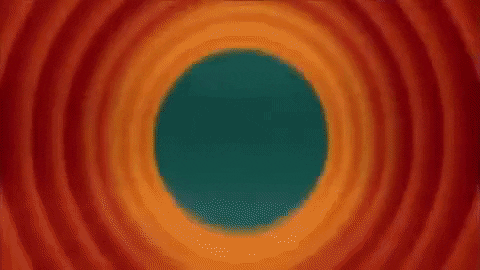

## DATA....DATA....DATA
[Stanford Sentiment tree bank](https://nlp.stanford.edu/sentiment/)

In [ ]:
!pip install pytreebank

  Created wheel for pytreebank: filename=pytreebank-0.2.7-py3-none-any.whl size=37070 sha256=d61b4a27b652a098ea248970f271f0f0a4a9aa20287c489a48854d1153d5cdaf
  Stored in directory: /root/.cache/pip/wheels/5b/84/1b/8fbd390149c4c56517bf3cb62bb25d3cf6f5cf575e66710ced
Successfully built pytreebank


In [ ]:
## Download Dataset

import pytreebank
import sys
import os

out_path = os.path.join(sys.path[0], 'sst_{}.txt')
dataset = pytreebank.load_sst('./raw_data')

# Store train, dev and test in separate files
for category in ['train', 'test', 'dev']:
    with open(out_path.format(category), 'w') as outfile:
        for item in dataset[category]:
            outfile.write("__label__{}\t{}\n".format(
                item.to_labeled_lines()[0][0] + 1,
                item.to_labeled_lines()[0][1]
            ))
# Print the length of the training set
print(len(dataset['train']))

8544


In [ ]:
## Save Training data as csv file
import pandas as pd
# Read train data
train_df = pd.read_csv('/content/sst_train.txt', sep='\t', header=None, names=['truth', 'text'])
train_df['truth'] = train_df['truth'].str.replace('__label__', '')
train_df['truth'] = train_df['truth'].astype(int).astype('category')
train_df.truth.replace((1,2,3,4,5), (0,1,2,3,4), inplace=True)

train_df.head()

truth                                               text
0      3  The Rock is destined to be the 21st Century 's...
1      4  The gorgeously elaborate continuation of `` Th...
2      3  Singer/composer Bryan Adams contributes a slew...
3      2  You 'd think by now America would have had eno...
4      3               Yet the act is still charming here .

In [ ]:
train_df.shape

(8544, 2)

In [ ]:
train_df.groupby('truth').count()

text
truth      
0      1092
1      2218
2      1624
3      2322
4      1288

In [ ]:
train_df.to_csv('/content/sst_train.csv')

In [ ]:
## Save Test data as csv file
import pandas as pd
# Read train data
test_df = pd.read_csv('/content/sst_test.txt', sep='\t', header=None, names=['truth', 'text'])
test_df['truth'] = test_df['truth'].str.replace('__label__', '')
test_df['truth'] = test_df['truth'].astype(int).astype('category')
test_df.truth.replace((1,2,3,4,5), (0,1,2,3,4), inplace=True)

test_df.head()

truth                                               text
0      2                     Effective but too-tepid biopic
1      3  If you sometimes like to go to the movies to h...
2      4  Emerges as something rare , an issue movie tha...
3      2  The film provides some great insight into the ...
4      4  Offers that rare combination of entertainment ...

In [ ]:
test_df.shape

(2210, 2)

In [ ]:
test_df.groupby('truth').count()

text
truth      
0       279
1       633
2       389
3       510
4       399

In [ ]:
test_df.to_csv('/content/sst_test.csv')

Lets Evaluate

In [ ]:
def vader_sentiment(sentence):
  result = senti_obj.polarity_scores(sentence)
  score = result['compound']
  if -1<=score<-0.6:
    return 0
  if -0.6<=score<-0.2:
    return 1fro
  if -0.2<=score<0.2:
    return 2
  if 0.2<=score<0.6:
    return 3
  if 0.6<=score<=1:
    return 4

In [ ]:
vader_sentiment("ok concepts, but need a break")

2

In [ ]:
test_df.head()

truth                                               text
0      2                     Effective but too-tepid biopic
1      3  If you sometimes like to go to the movies to h...
2      4  Emerges as something rare , an issue movie tha...
3      2  The film provides some great insight into the ...
4      4  Offers that rare combination of entertainment ...

In [ ]:
scores = []
for text in test_df.text:
  scores.append(vader_sentiment(text))

In [ ]:
test_df["Vader"] = scores

In [ ]:
test_df.head()

truth                                               text  Vader
0      2                     Effective but too-tepid biopic      3
1      3  If you sometimes like to go to the movies to h...      4
2      4  Emerges as something rare , an issue movie tha...      4
3      2  The film provides some great insight into the ...      3
4      4  Offers that rare combination of entertainment ...      3

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_df.truth, test_df.Vader, labels = list(set(test_df.truth))))

              precision    recall  f1-score   support

           0       0.33      0.18      0.24       279
           1       0.43      0.25      0.31       633
           2       0.22      0.35      0.27       389
           3       0.30      0.35      0.32       510
           4       0.36      0.43      0.39       399

    accuracy                           0.31      2210
   macro avg       0.33      0.31      0.31      2210
weighted avg       0.34      0.31      0.31      2210



In [ ]:
# Drawbacks of rule based
# vader_sentiment("Ugghh...I want a holiday. This day is dreadful")
# vader_sentiment("I could say this play was great, but that would mean i am mistaken")
# vader_sentiment("Only you would think that you are the best programmer in the world")

## Machine Learning Solution

But.....Machines only understand numbers. So convert them

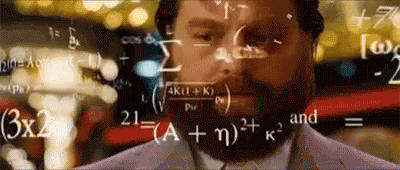

Few Way to vectorize - 

1.   Bag of words approach (BOW)
2.   Count Vectorizer
3.   Term Frequency Inverse Document Frequency (TF-IDF) [hyperlink](https://monkeylearn.com/blog/what-is-tf-idf/)





In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf = True, use_idf = True, lowercase=False, stop_words='english')

In [ ]:
vect = vectorizer.fit_transform(["My name is Saurabh and I approve this message"])
vect

<1x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
vect.shape

(1, 4)

In [ ]:
vectorizer.inverse_transform(vect)

[array(['message', 'approve', 'Saurabh', 'My'], dtype='<U7')]

In [ ]:
vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.8, sublinear_tf = True, use_idf = True, lowercase=False, stop_words='english', decode_error="ignore")


In [ ]:
train_df.head()

truth                                               text
0      3  The Rock is destined to be the 21st Century 's...
1      4  The gorgeously elaborate continuation of `` Th...
2      3  Singer/composer Bryan Adams contributes a slew...
3      2  You 'd think by now America would have had eno...
4      3               Yet the act is still charming here .

In [ ]:
train_vectors = vectorizer.fit_transform(train_df.text)
test_vectors = vectorizer.transform(test_df.text)

In [ ]:
train_vectors.shape

(8544, 3372)

In [ ]:
from sklearn import svm

classifier_linear = svm.SVC(kernel='linear', probability=True)
classifier_linear.fit(train_vectors, train_df.truth)

SVC(kernel='linear', probability=True)

In [ ]:
## Prediction
prediction_linear = classifier_linear.predict(test_vectors)

In [ ]:
test_df.head()

truth                                               text  Vader  SVM_1
0      2                     Effective but too-tepid biopic      3      1
1      3  If you sometimes like to go to the movies to h...      4      3
2      4  Emerges as something rare , an issue movie tha...      4      4
3      2  The film provides some great insight into the ...      3      2
4      4  Offers that rare combination of entertainment ...      3      4

In [ ]:
test_df["SVM_1"] = list(prediction_linear)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_df.truth, test_df.SVM_1, labels = list(set(test_df.truth))))

              precision    recall  f1-score   support

           0       0.34      0.15      0.21       279
           1       0.42      0.56      0.48       633
           2       0.27      0.19      0.22       389
           3       0.38      0.58      0.46       510
           4       0.57      0.29      0.38       399

    accuracy                           0.40      2210
   macro avg       0.40      0.35      0.35      2210
weighted avg       0.40      0.40      0.38      2210



In [ ]:
## Redo SVM model
from sklearn import svm

classifier_linear = svm.SVC( probability=True)
classifier_linear.fit(train_vectors, train_df.truth)

SVC(probability=True)

In [ ]:
## Prediction
prediction_linear = classifier_linear.predict(test_vectors)

In [ ]:
test_df["SVM_2"] = list(prediction_linear)

In [ ]:
test_df

truth                                               text  ...  SVM_1  SVM_2
0         2                     Effective but too-tepid biopic  ...      1      1
1         3  If you sometimes like to go to the movies to h...  ...      3      3
2         4  Emerges as something rare , an issue movie tha...  ...      4      1
3         2  The film provides some great insight into the ...  ...      2      3
4         4  Offers that rare combination of entertainment ...  ...      4      3
...     ...                                                ...  ...    ...    ...
2205      3                   An imaginative comedy/thriller .  ...      3      3
2206      4                      ( A ) rare , beautiful film .  ...      4      4
2207      4                 ( An ) hilarious romantic comedy .  ...      4      4
2208      3                Never ( sinks ) into exploitation .  ...      1      1
2209      0                        ( U ) nrelentingly stupid .  ...      0      0

[2210 rows x 5 columns]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_df.truth, test_df.SVM_2, labels=list(set(test_df.truth))))

              precision    recall  f1-score   support

           0       0.42      0.07      0.12       279
           1       0.43      0.63      0.51       633
           2       0.34      0.12      0.17       389
           3       0.37      0.73      0.49       510
           4       0.73      0.17      0.27       399

    accuracy                           0.41      2210
   macro avg       0.46      0.34      0.31      2210
weighted avg       0.45      0.41      0.35      2210



## Model Explainability

 Machine Learning is a black-box!! Isn't it?

Model Explainability aim at building two types of trust:

1. **Trusting a prediction:** a user will trust an individual prediction to act upon. No user wants to accept a model prediction on blind faith, especially if the consequences can be catastrophic.

2. **Trusting a model:** the user gains enough trust that the model will behave in reasonable ways when deployed. Although in the modeling stage accuracy metrics are used on multiple validation datasets to mimic the real-world data, there often exist significant differences in the real-world data. Besides using the accuracy metrics, we need to test the individual prediction explanations.

Using Local Interpretable Model-Agnostic Explanations [LIME](https://medium.com/dataman-in-ai/explain-your-model-with-lime-5a1a5867b423)

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=372e02ff9ddac55a4e02ce938af6499bfd462c134a2e5c44e3e2decace02df9c
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
# from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, classifier_linear)

In [ ]:
c.predict(["this is the best test sentence"])

In [ ]:
print(c.predict_proba(["this is the best test sentence"]))
print(c.predict(["this is the best test sentence"]))

[[0.04473821 0.12422849 0.22513982 0.18021416 0.42567932]]
[4]


In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=list(set(train_df.truth)))

In [ ]:
idx = 2208
# idx = 0
exp = explainer.explain_instance(test_df.text[idx], c.predict_proba, top_labels=2)

In [ ]:
exp.show_in_notebook(text=True)


In [ ]:
test_df

truth                                               text  ...  SVM_1  SVM_2
0         2                     Effective but too-tepid biopic  ...      1      1
1         3  If you sometimes like to go to the movies to h...  ...      3      3
2         4  Emerges as something rare , an issue movie tha...  ...      4      1
3         2  The film provides some great insight into the ...  ...      2      3
4         4  Offers that rare combination of entertainment ...  ...      4      3
...     ...                                                ...  ...    ...    ...
2205      3                   An imaginative comedy/thriller .  ...      3      3
2206      4                      ( A ) rare , beautiful film .  ...      4      4
2207      4                 ( An ) hilarious romantic comedy .  ...      4      4
2208      3                Never ( sinks ) into exploitation .  ...      1      1
2209      0                        ( U ) nrelentingly stupid .  ...      0      0

[2210 rows x 5 columns]

# Sentiment Analysis with BERT

> TL;DR In this tutorial, you'll learn how to fine-tune BERT for sentiment analysis. You'll do the required text preprocessing (special tokens, padding, and attention masks) and build a Sentiment Classifier using the amazing Transformers library by Hugging Face!

- [Read the tutorial](https://www.curiousily.com/posts/sentiment-analysis-with-bert-and-hugging-face-using-pytorch-and-python/)
- [Run the notebook in your browser (Google Colab)](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S)
- [Read the `Getting Things Done with Pytorch` book](https://github.com/curiousily/Getting-Things-Done-with-Pytorch)

You'll learn how to:

- Intuitively understand what BERT is
- Preprocess text data for BERT and build PyTorch Dataset (tokenization, attention masks, and padding)
- Use Transfer Learning to build Sentiment Classifier using the Transformers library by Hugging Face
- Evaluate the model on test data
- Predict sentiment on raw text

Let's get started!

## What is BERT?

BERT (introduced in [this paper](https://arxiv.org/abs/1810.04805)) stands for Bidirectional Encoder Representations from Transformers. If you don't know what most of that means - you've come to the right place! Let's unpack the main ideas:

- Bidirectional - to understand the text  you're looking you'll have to look back (at the previous words) and forward (at the next words)
- Transformers - The [Attention Is All You Need](https://arxiv.org/abs/1706.03762) paper presented the Transformer model. The Transformer reads entire sequences of tokens at once. In a sense, the model is non-directional, while LSTMs read sequentially (left-to-right or right-to-left). The attention mechanism allows for learning contextual relations between words (e.g. `his` in a sentence refers to Jim).
- (Pre-trained) contextualized word embeddings - [The ELMO paper](https://arxiv.org/abs/1802.05365v2) introduced a way to encode words based on their meaning/context. Nails has multiple meanings - fingernails and metal nails.

BERT was trained by masking 15% of the tokens with the goal to guess them. An additional objective was to predict the next sentence. Let's look at examples of these tasks:

### Masked Language Modeling (Masked LM)

The objective of this task is to guess the masked tokens. Let's look at an example, and try to not make it harder than it has to be:

That's `[mask]` she `[mask]` -> That's what she said

### Next Sentence Prediction (NSP)

Given a pair of two sentences, the task is to say whether or not the second follows the first (binary classification). Let's continue with the example:

*Input* = `[CLS]` That's `[mask]` she `[mask]`. [SEP] Hahaha, nice! [SEP]

*Label* = *IsNext*

*Input* = `[CLS]` That's `[mask]` she `[mask]`. [SEP] Dwight, you ignorant `[mask]`! [SEP]

*Label* = *NotNext*

The training corpus was comprised of two entries: [Toronto Book Corpus](https://arxiv.org/abs/1506.06724) (800M words) and English Wikipedia (2,500M words). While the original Transformer has an encoder (for reading the input) and a decoder (that makes the prediction), BERT uses only the decoder.

BERT is simply a pre-trained stack of Transformer Encoders. How many Encoders? We have two versions - with 12 (BERT base) and 24 (BERT Large).

### Is This Thing Useful in Practice?

The BERT paper was released along with [the source code](https://github.com/google-research/bert) and pre-trained models.

The best part is that you can do Transfer Learning (thanks to the ideas from OpenAI Transformer) with BERT for many NLP tasks - Classification, Question Answering, Entity Recognition, etc. You can train with small amounts of data and achieve great performance!

## Setup

We'll need [the Transformers library](https://huggingface.co/transformers/) by Hugging Face:

In [ ]:
!pip install -q -U watermark
!pip install -qq transformers==2.7.0
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.2 which is incompatible.
     |████████████████████████████████| 544 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 38.9 MB/s 
     |████████████████████████████████| 131 kB 49.1 MB/s 
     |████████████████████████████████| 5.6 MB 14.1 MB/s 
     |████████████████████████████████| 895 kB 39.7 MB/s 
     |████████████████████████████████| 8.2 MB 31.4 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 138 kB 51.4 MB/s 
     |████████████████████████████████| 127 kB 50.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflic

In [ ]:

#@title Setup & Config
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

## Data Preprocessing

You might already know that Machine Learning models don't work with raw text. You need to convert text to numbers (of some sort). BERT requires even more attention (good one, right?). Here are the requirements: 

- Add special tokens to separate sentences and do classification
- Pass sequences of constant length (introduce padding)
- Create array of 0s (pad token) and 1s (real token) called *attention mask*

The Transformers library provides (you've guessed it) a wide variety of Transformer models (including BERT). It works with TensorFlow and PyTorch! It also includes prebuild tokenizers that do the heavy lifting for us!


In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

> You can use a cased and uncased version of BERT and tokenizer. I've experimented with both. The cased version works better. Intuitively, that makes sense, since "BAD" might convey more sentiment than "bad".

In [ ]:
from transformers import BertTokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

We'll use this text to understand the tokenization process:

In [ ]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

In [ ]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [1332, 1108, 146, 1314, 1796, 136, 146, 1821, 5342, 1120, 1313, 1111, 123, 2277, 119]


### Special Tokens

`[SEP]` - marker for ending of a sentence


In [ ]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

`[CLS]` - we must add this token to the start of each sentence, so BERT knows we're doing classification

In [ ]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

There is also a special token for padding:

In [ ]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

BERT understands tokens that were in the training set. Everything else can be encoded using the `[UNK]` (unknown) token:

In [ ]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

All of that work can be done using the [`encode_plus()`](https://huggingface.co/transformers/main_classes/tokenizer.html#transformers.PreTrainedTokenizer.encode_plus) method:

In [ ]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

The token ids are now stored in a Tensor and padded to a length of 32:

In [ ]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1120, 1313,
        1111,  123, 2277,  119,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])

The attention mask has the same length:

In [ ]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

We can inverse the tokenization to have a look at the special tokens:

In [ ]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'When',
 'was',
 'I',
 'last',
 'outside',
 '?',
 'I',
 'am',
 'stuck',
 'at',
 'home',
 'for',
 '2',
 'weeks',
 '.',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

### Choosing Sequence Length

BERT works with fixed-length sequences. We'll use a simple strategy to choose the max length. Let's store the token length of each review:

In [ ]:
token_lens = []

for txt in train_df.text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

and plot the distribution:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


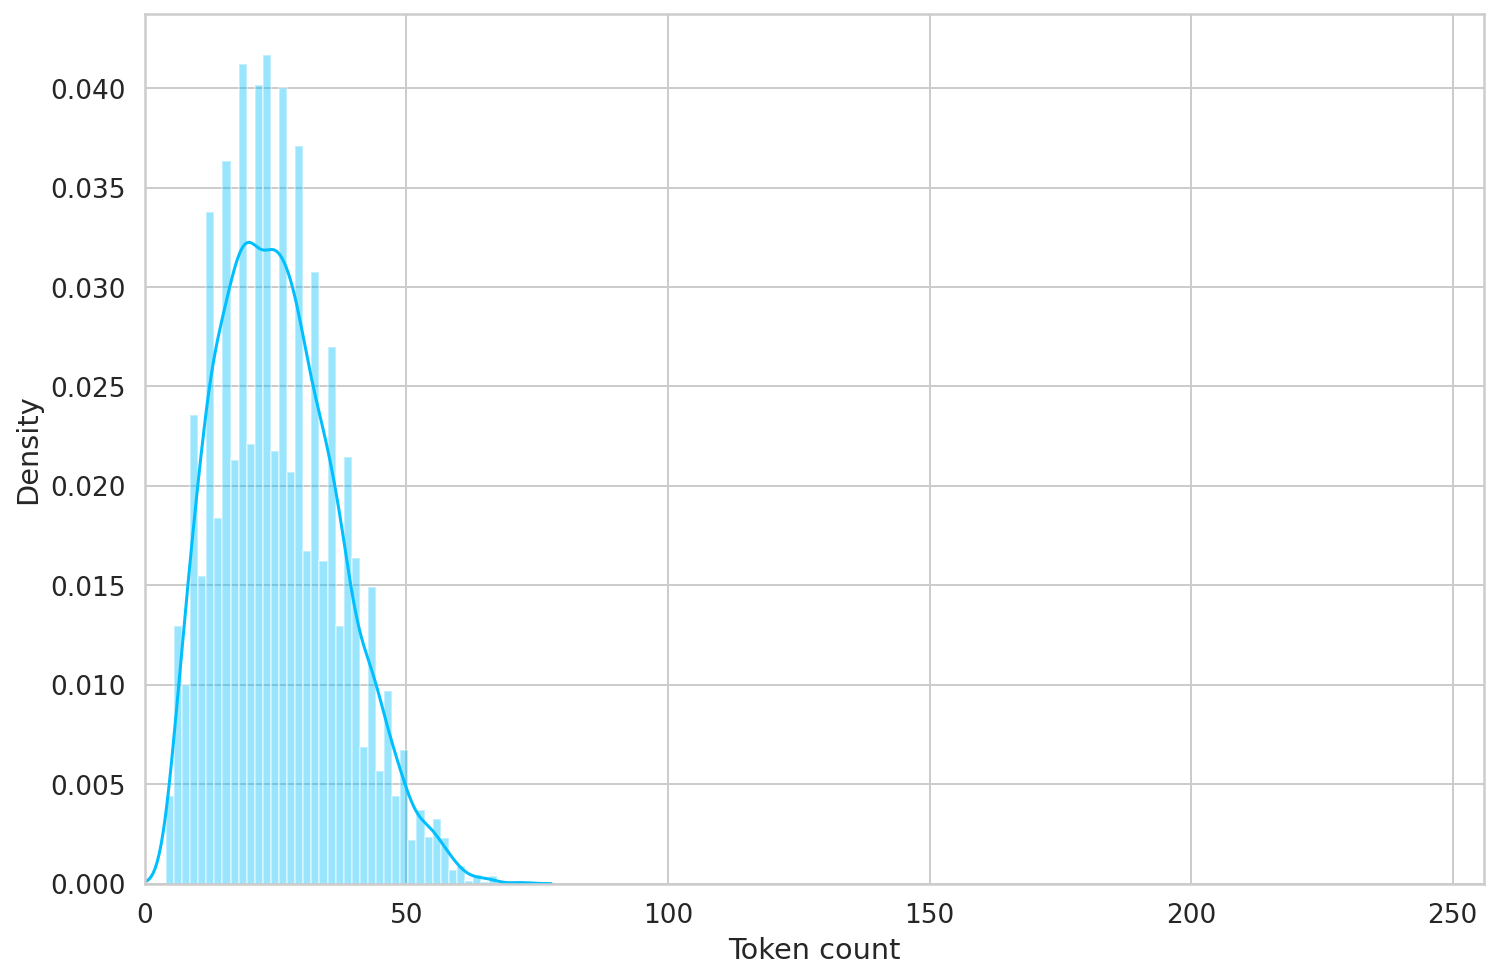

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

Most of the reviews seem to contain less than 50 tokens, but we'll be on the safe side and choose a maximum length of 75.

In [ ]:
MAX_LEN = 75

We have all building blocks required to create a PyTorch dataset. Let's do it:

In [ ]:
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

The tokenizer is doing most of the heavy lifting for us. We also return the review texts, so it'll be easier to evaluate the predictions from our model. Let's split the data:

In [ ]:
train_df, val_df = train_test_split(train_df, test_size=0.2, shuffle=True, stratify=train_df.truth)

In [ ]:
val_df.groupby('truth').count()

text
truth      
0       218
1       444
2       325
3       464
4       258

In [ ]:
train_df.shape, val_df.shape, test_df.shape

((6835, 2), (1709, 2), (2210, 2))

We also need to create a couple of data loaders. Here's a helper function to do it:

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.text.to_numpy(),
    targets=df.truth.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=0
  )

In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(train_df, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(val_df, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(test_df, tokenizer, MAX_LEN, BATCH_SIZE)

Let's have a look at an example batch from our training data loader:

In [ ]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 75])
torch.Size([16, 75])
torch.Size([16])


## Sentiment Classification with BERT and Hugging Face

There are a lot of helpers that make using BERT easy with the Transformers library. Depending on the task you might want to use [BertForSequenceClassification](https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification), [BertForQuestionAnswering](https://huggingface.co/transformers/model_doc/bert.html#bertforquestionanswering) or something else. 

But who cares, right? We're *hardcore*! We'll use the basic [BertModel](https://huggingface.co/transformers/model_doc/bert.html#bertmodel) and build our sentiment classifier on top of it. Let's load the model:

In [ ]:
from transformers import BertModel

In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

**Architecture**
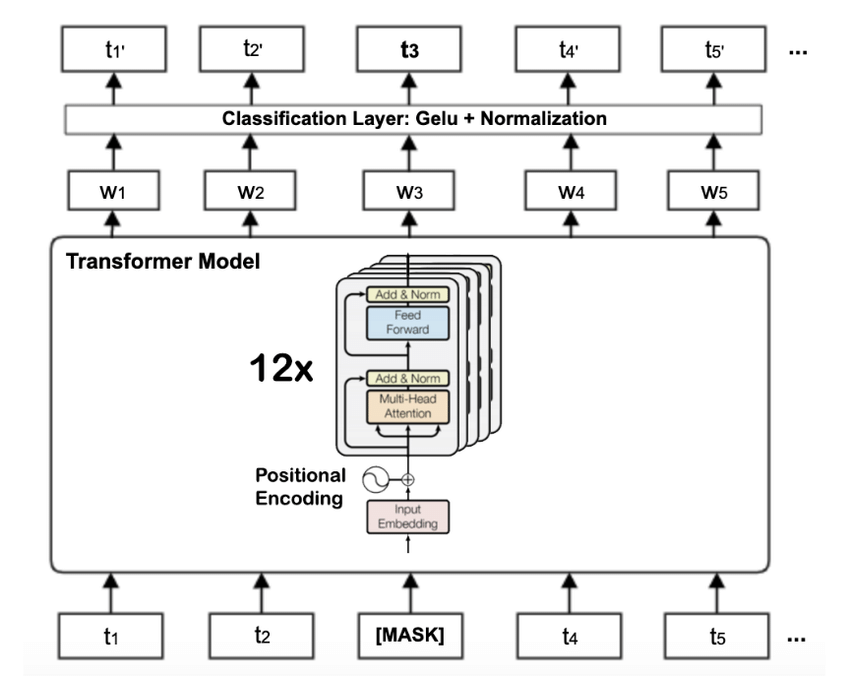
We can use all of this knowledge to create a classifier that uses the BERT model:

In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.1)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

Our classifier delegates most of the heavy lifting to the BertModel. We use a dropout layer for some regularization and a fully-connected layer for our output. Note that we're returning the raw output of the last layer since that is required for the cross-entropy loss function in PyTorch to work.

This should work like any other PyTorch model. Let's create an instance and move it to the GPU:

In [ ]:
model = SentimentClassifier(5)
model = model.to(device)

We'll move the example batch of our training data to the GPU:

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 75])
torch.Size([16, 75])


To get the predicted probabilities from our trained model, we'll apply the softmax function to the outputs:

In [ ]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.2809, 0.1102, 0.3100, 0.1137, 0.1852],
        [0.2231, 0.1071, 0.2443, 0.1338, 0.2918],
        [0.2598, 0.1153, 0.3112, 0.0802, 0.2335],
        [0.3230, 0.0884, 0.3062, 0.1113, 0.1711],
        [0.2958, 0.1278, 0.2239, 0.1060, 0.2465],
        [0.2605, 0.1098, 0.3313, 0.1100, 0.1883],
        [0.2676, 0.1000, 0.2801, 0.0997, 0.2526],
        [0.2749, 0.1293, 0.2794, 0.1367, 0.1797],
        [0.2667, 0.0839, 0.3275, 0.1211, 0.2008],
        [0.2344, 0.1045, 0.3399, 0.1007, 0.2205],
        [0.2699, 0.0829, 0.3040, 0.1190, 0.2242],
        [0.3024, 0.1076, 0.2827, 0.0939, 0.2135],
        [0.2796, 0.1115, 0.2305, 0.1321, 0.2463],
        [0.2516, 0.1368, 0.2578, 0.0949, 0.2590],
        [0.2563, 0.1316, 0.2843, 0.1232, 0.2046],
        [0.2276, 0.1306, 0.2537, 0.1175, 0.2705]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

### Training

To reproduce the training procedure from the BERT paper, we'll use the [AdamW](https://huggingface.co/transformers/main_classes/optimizer_schedules.html#adamw) optimizer provided by Hugging Face. It corrects weight decay, so it's similar to the original paper. We'll also use a linear scheduler with no warmup steps:

In [ ]:
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

How do we come up with all hyperparameters? The BERT authors have some recommendations for fine-tuning:

- Batch size: 16, 32
- Learning rate (Adam): 5e-5, 3e-5, 2e-5
- Number of epochs: 2, 3, 4

We're going to ignore the number of epochs recommendation but stick with the rest. Note that increasing the batch size reduces the training time significantly, but gives you lower accuracy.

Let's continue with writing a helper function for training our model for one epoch:

In [ ]:
from tqdm import tqdm

In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

Training the model should look familiar, except for two things. The scheduler gets called every time a batch is fed to the model. We're avoiding exploding gradients by clipping the gradients of the model using [clip_grad_norm_](https://pytorch.org/docs/stable/nn.html#clip-grad-norm).

Let's write another one that helps us evaluate the model on a given data loader:

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in tqdm(data_loader):
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

Using those two, we can write our training loop. We'll also store the training history:

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING']='1'

In [ ]:
!nvidia-smi

Fri Nov 26 18:48:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    77W / 149W |   1941MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
train_df.groupby('truth').count()

text
truth      
0       874
1      1774
2      1299
3      1858
4      1030

In [ ]:
train_df.head()


truth                                               text
5927      1  Kicks off with an inauspicious premise , mopes...
6326      1  Abandon spends 90 minutes trying figure out wh...
8111      1  A relentless , bombastic and ultimately empty ...
8507      1                                    Tends to plod .
7032      1  The crassness of this reactionary thriller is ...

In [ ]:
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(train_df)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(val_df)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

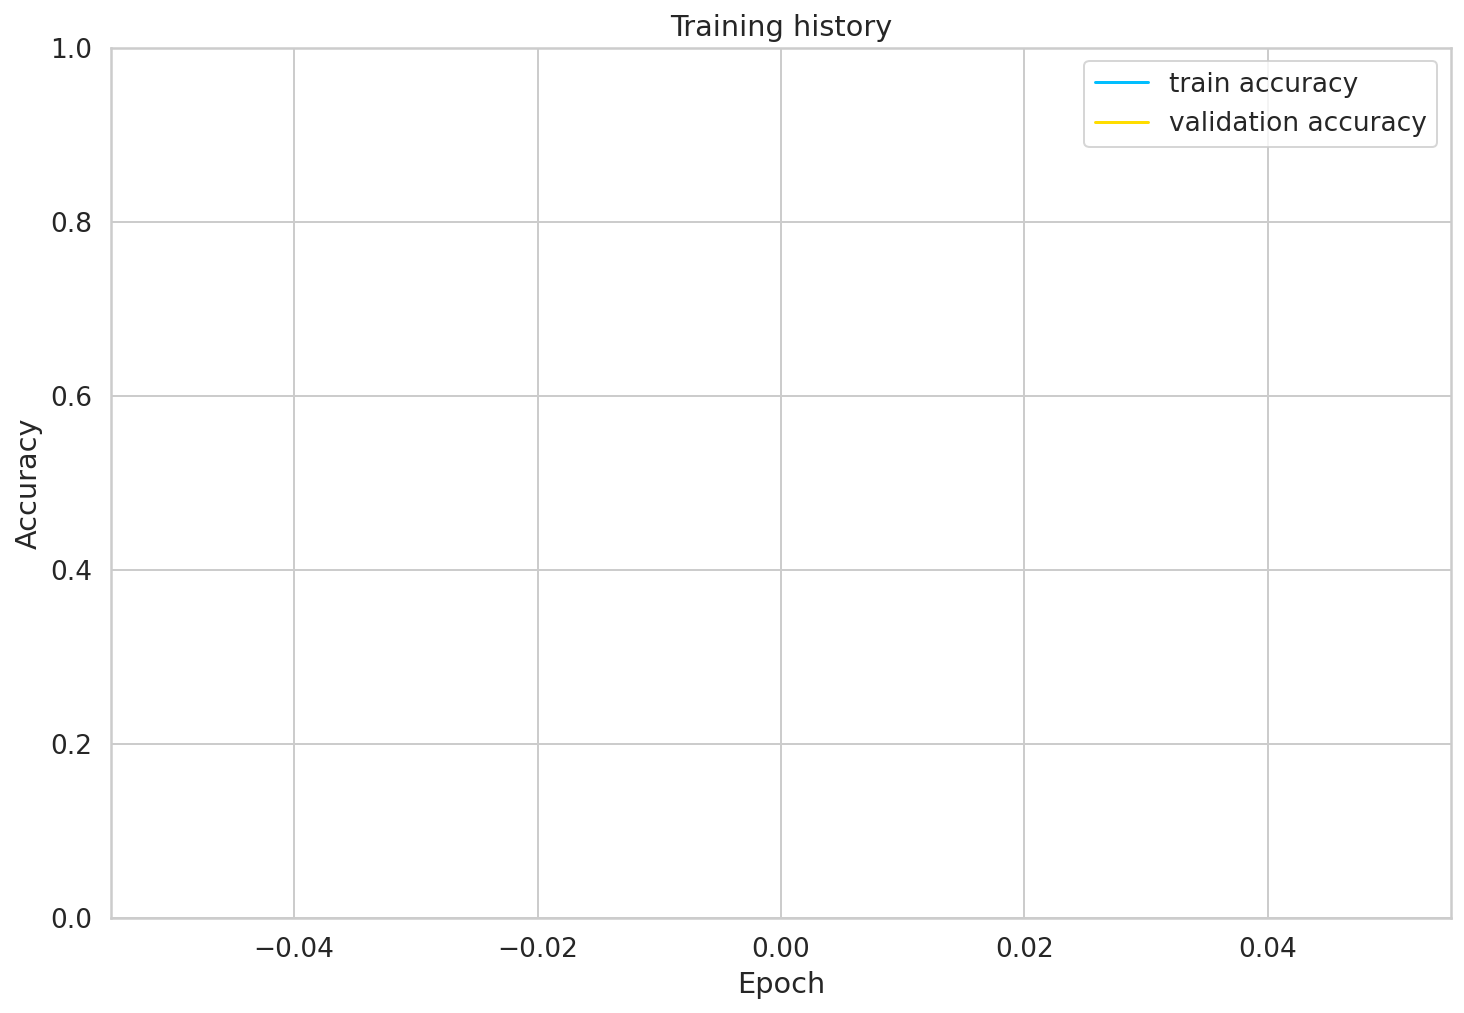

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
model = torch.load("/content/drive/MyDrive/Best Model/model.pt")
model.to(device)

SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

Note that we're storing the state of the best model, indicated by the highest validation accuracy.
Whoo, this took some time! We can look at the training vs validation accuracy:

In [ ]:
# model.bert.save_pretrained("/content/drive/MyDrive/Best Model")

In [ ]:
# tokenizer.save_pretrained("/content/drive/MyDrive/Best Model")

## Evaluation

So how good is our model on predicting sentiment? Let's start by calculating the accuracy on the test data:

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(test_df)
)

test_acc.item()

100%|██████████| 139/139 [00:23<00:00,  5.80it/s]


0.4990950226244344

The accuracy is about 1% lower on the test set. Our model seems to generalize well.

We'll define a helper function to get the predictions from our model:

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

This is similar to the evaluation function, except that we're storing the text of the reviews and the predicted probabilities (by applying the softmax on the model outputs):

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

Let's have a look at the classification report

In [ ]:
test_df.head()

truth                                               text
0      2                     Effective but too-tepid biopic
1      3  If you sometimes like to go to the movies to h...
2      4  Emerges as something rare , an issue movie tha...
3      2  The film provides some great insight into the ...
4      4  Offers that rare combination of entertainment ...

In [ ]:
test_df['BERT']=y_pred

In [ ]:
test_df.head()

truth                                               text  BERT
0      2                     Effective but too-tepid biopic     1
1      3  If you sometimes like to go to the movies to h...     3
2      4  Emerges as something rare , an issue movie tha...     3
3      2  The film provides some great insight into the ...     3
4      4  Offers that rare combination of entertainment ...     4

In [ ]:
class_names = list(str(i) for i in set(train_df.truth))
class_names

['0', '1', '2', '3', '4']

In [ ]:
print(classification_report(y_test.tolist(), y_pred.tolist(), target_names=class_names))

              precision    recall  f1-score   support

           0       0.53      0.38      0.44       279
           1       0.57      0.58      0.57       633
           2       0.33      0.40      0.36       389
           3       0.48      0.56      0.51       510
           4       0.64      0.48      0.55       399

    accuracy                           0.50      2210
   macro avg       0.51      0.48      0.49      2210
weighted avg       0.51      0.50      0.50      2210



Looks like it is really hard to classify neutral (3 stars) reviews. And I can tell you from experience, looking at many reviews, those are hard to classify.

We'll continue with the confusion matrix:

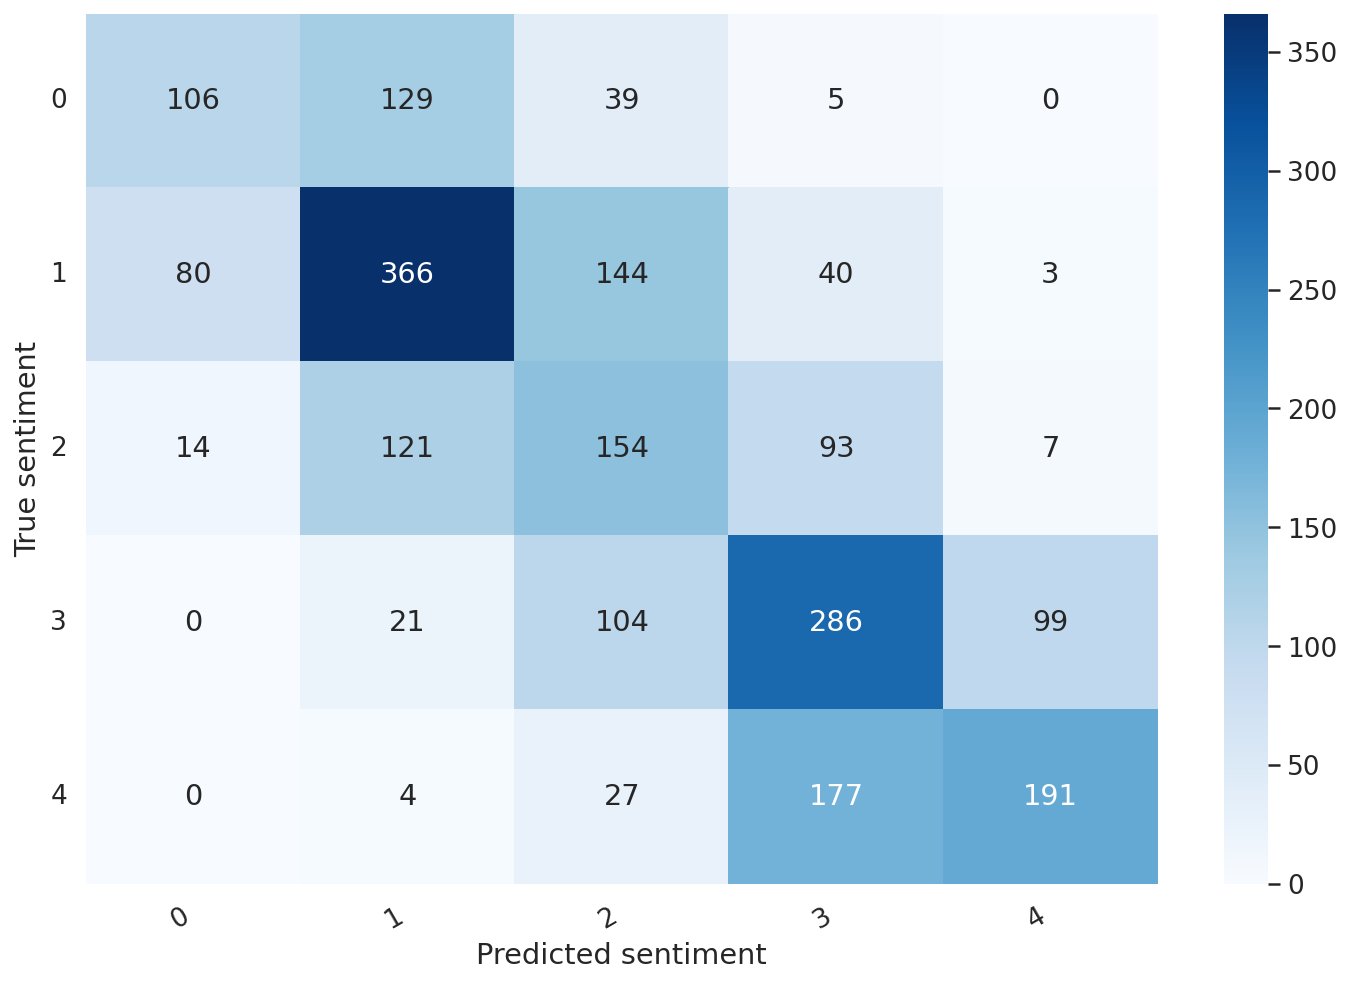

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

This confirms that our model is having difficulty classifying neutral reviews. It mistakes those for negative and positive at a roughly equal frequency.

That's a good overview of the performance of our model. But let's have a look at an example from our test data:

In [ ]:
idx = 2

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

In [ ]:
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names[true_sentiment]}')

Emerges as something rare , an issue movie that 's so honest and
keenly observed that it does n't feel like one .

True sentiment: 4


### Predicting on Raw Text

Let's use our model to predict the sentiment of some raw text:

In [ ]:
review_text = "I love completing my todos! Best app ever!!!"

We have to use the tokenizer to encode the text:

In [ ]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

Let's get the predictions from our model:

In [ ]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

Review text: I love completing my todos! Best app ever!!!
Sentiment  : 4


In [ ]:
def predict_proba(text):
  model.eval()
  model.to(device)

  #### Predict 
  encoded_ = tokenizer.batch_encode_plus(
      text,
      max_length = MAX_LEN,
      add_special_tokens = True,
      return_token_type_ids = False,
      pad_to_max_length = True,
      return_attention_mask = True,
      return_tensors = 'pt',
      truncation=True
  )
  input_ids = encoded_['input_ids'].to(device)
  attention_mask = encoded_['attention_mask'].to(device)
  with torch.no_grad():
    output = model(input_ids = input_ids, attention_mask=attention_mask)
  return F.softmax(output, dim=-1).cpu().detach().numpy()

In [ ]:
explainer = LimeTextExplainer(class_names= class_names)

In [ ]:
review_text

'I love completing my todos! Best app ever!!!'

In [ ]:
exp = explainer.explain_instance(review_text, predict_proba, top_labels=2, num_features=20, num_samples=50)

In [ ]:
exp.show_in_notebook(text=True)

## References

- [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)
- [L11 Language Models - Alec Radford (OpenAI)](https://www.youtube.com/watch?v=BnpB3GrpsfM)
- [The Illustrated BERT, ELMo, and co.](https://jalammar.github.io/illustrated-bert/)
- [BERT Fine-Tuning Tutorial with PyTorch](https://mccormickml.com/2019/07/22/BERT-fine-tuning/)
- [How to Fine-Tune BERT for Text Classification?](https://arxiv.org/pdf/1905.05583.pdf)
- [Huggingface Transformers](https://huggingface.co/transformers/)
- [BERT Explained: State of the art language model for NLP](https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270)

In [ ]:
torch.save(model.cpu(), "/content/drive/MyDrive/Best Model/model.pt")

# One-off accuracy

In [ ]:
actual_column = 'truth'
verify_column = 'BERT'

In [ ]:
accuracy = 0
for i, d in test_df.iterrows():
  remainder = abs(d[verify_column] - d[actual_column])
  if remainder<2:
    accuracy+=1
print(f"One-off accuracy of {verify_column} is {round(accuracy/len(test_df),2)}")

Oneoff accuracy of BERT is 0.93


Homework [emoji predictor](https://www.kaggle.com/hariharasudhanas/twitter-emoji-prediction/version/1)

In [ ]:
#https://www.kaggle.com/hariharasudhanas/twitter-emoji-prediction/version/1